## Week 3-2 - Logistic Regression - homework

In this assignment, you'll do a logistic regression to look at the effect of sex and class on survival on the titanic, by computing odds ratios.

Some references:

- [What are odds vs. probability?](https://towcenter.gitbooks.io/curious-journalist-s-guide-to-data/content/analysis/counting_possible_worlds.html)
- An example of a story based on an odds ratio: [Deadly force in black and white](https://www.propublica.org/article/deadly-force-in-black-and-white)
- [Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) Here it's being used for prediction by looking at the output, whereas we are using it for explanation by looking at the coefficient, but setting it up works the same.
- [How do I interpret odds ratios in logistic regression?](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/) This one's a little more technical, but has good examples.


In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### Load the data

Read in the `titanic.csv` data set again.

In [2]:
# Load titanic.csv
titanic = pd.read_csv('titanic.csv')
titanic

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male


The first thing we need to do is code the pclass and gender variables numerically. Let's use the following scheme:
- pclass: 1,2,3
- gender: 0=male, 1=female, and let's call the column called "female" to remind us which is which

In [5]:
# recode the pclass and gender variables so they are numeric
titanic = titanic.replace({'1st':1, '2nd':2, '3rd':3, 'female':1, 'male':0})
titanic

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,1
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,1
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,0
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,1
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,0
5,1,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,0
6,1,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,1
7,1,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,0
8,1,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,1
9,1,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,0


### 2. Looking at one variable at a time

First, do a logistic regression of the `female` variable alone. Below is some code that will help you plot the result.


In [16]:
# function to plot single variable logistic regression results
def plot_logistic_regression(x, y, lm):

    # plot original data
    plt.scatter(x=x,y=y)

    # Now plot the prediction of the fitted model
    predict_x = np.linspace(x.min(), x.max(), 10).reshape(-1, 1) # some evenly spaced points to predict
    predict_y = lm.predict_proba(predict_x)[:,1] #  probability of result = true
    plt.plot(predict_x, predict_y, '-', color='m')

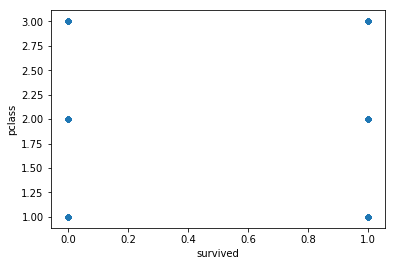

In [22]:
# Do a logistic regression of survived against pclass
x = titanic[['survived']].values
y = titanic[['pclass']].values
titanic.plot(kind='scatter',x='survived',y='pclass')

/Users/linleysanders/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


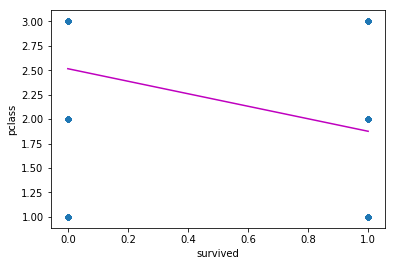

In [15]:
from sklearn.linear_model import LinearRegression,LogisticRegression

lm = LinearRegression()
lm.fit(x,y)
titanic.plot(kind='scatter',x='survived',y='pclass')
plt.plot(x,lm.predict(x),'-',color='m')

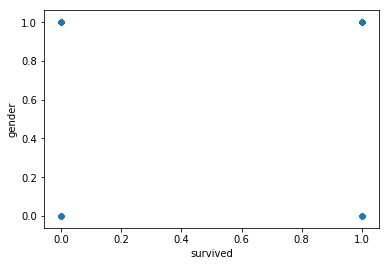

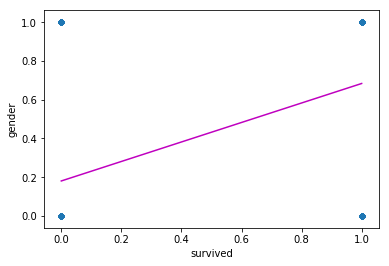

In [24]:
# Do a logistic regression of survived against pclass
x = titanic[['survived']].values
y = titanic[['gender']].values
titanic.plot(kind='scatter',x='survived',y='gender')

from sklearn.linear_model import LinearRegression,LogisticRegression

lm = LinearRegression()
lm.fit(x,y)
titanic.plot(kind='scatter',x='survived',y='gender')
plt.plot(x,lm.predict(x),'-',color='m')

The plot may not look like much, because there are only two values of `female` so most of the dots are on top of eachother. But the regression should capture the fact that more women survived than men, by sloping upward. 

Most of the information will be in the resulting odds ratio. This will tell us how much the odds of surivial differ between men and women. Compute it now.

In [46]:
# What is the odds ratio of on the class variable?
cv = pd.crosstab(titanic.pclass, titanic.survived)
cv

survived,0,1
pclass,,
1,129,193
2,161,119
3,574,137


In [57]:
# odds of surving if you were in first class
first_odds = cv[1][1] / cv[0][1]
first_odds

1.496124031007752

In [61]:
# odds of surving if you were in second class
second_odds = cv[1][2] / cv[0][2]
second_odds

0.7391304347826086

In [52]:
# odds of surving if you were in third class
third_odds = cv[1][3] / cv[0][3]
third_odds

0.23867595818815332

In [45]:
# What is the odds ratio of on the class variable?
gv = pd.crosstab(titanic.gender, titanic.survived)
gv

survived,0,1
gender,,
0,708,142
1,156,307


### 3. Looking at two variables at a time

We know from the earlier assignment that class also affects survival, so let's add that to our model. Compute a logistic regression on the variables `pclass` and `female`.

In [ ]:
# Logistic regression on two variables

    

Now compute the odds ratio on each variable. You can print it out slightly prettier by using the trick in the class where we changed it into a dataframe.

In [ ]:
# print out the odds ratios for each variable


### 4. What does this mean

What is the odds ratio on the `pclass` variable? What happens to the odds of survival when we move from 1st to 2nd or from 2nd to 3rd class?


The odds ratio on pclass is 0.36, meaning that the odds of survival decrease by about three times when we move from 1st to 2nd class, and again from 2nd to 3rd class.

The odds ratio on the `female` variable changed when we accounted for passenger class. Which direction, and what does this mean?

The odds ratio on `female` changed from 9.3 to 10.7. This means that when we are careful to compare the surivial rates of the sexes between passengers of the same class, we can see that women have even better odds of survival than it first appears. The number changes because the odds of surviving are lower in lower passenger classes, and those classes have more people in them. So when we only compare passengers within the same class, being female has an even greater advantage.

## Bonus: How much effect did opinion of Obamacare have in the 2016 election?

Let's look at votes for Trump in the ANES data again. Try it on the following columns:

- Who did you vote for? This will be our dependent variable
- Do you approve or disapprove of Obamacare?
- What political party are you registered for?

Start by doing a one variable logistic regression on vote vs. health care. Then add in political party, so that we are comparing the effect of opinion on health care only within voters who are registered to the same party. What happens to the odds ratio on the health care variable when we take into account which party they are registered to? Why?

In [ ]:
# The columns we'll use
voted_col = 'V162034a' # 1=Clinton, 2=Trump, 3=Johnson, 4=Stein, negative numbers = didn't vote or won't say
health_care_col = 'V161085' # pre-election survey. 1=approve, 2=dissaprove,  negative numbers = didn't vote or won't say
registered_col = 'V161019' # 1=democratic, 2=republican, 3=none, 4=other, negative = not applicable or refused

In [ ]:
# load the data and keep only the columns we need


In [ ]:
# throw out all rows where:
# - didn't vote Dem or GOP
# - wasn't registered demo or GOP 
# - answer on health care question is not approve or disaprove


In [ ]:
# Recode each variable so it's 0-1 instead of 1-2


In [ ]:
# Do a single variable logistic regression of vote on health care, and plot


In [ ]:
# What is the odds ratio of voting for Trump?
# That is, starting with the odds of voting for Trump if you approve of Obamacare,  
# how do the odds change if you dissaprove of Obamacare?


In [ ]:
# Do a multiple variable logistic regression of vote on health care and party registration


In [ ]:
# What is the odds ratio of voting for Trump if you dissaprove of Obamacare now?
# What is the odds ratio of voting for Trump if you are a registered Republican?


### Explain what you've learned from the single and multiple variable regression 

What happens to the odds ratio on the health care variable when we take into account which party they are registered to? Why?